In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics

In [2]:
model = pd.read_csv('../dataset_diabetes/diabetic_data_modeling.csv')
model.head()

,Unnamed: 0,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,glyburide-metformin,change,diabetesMed,readmitted,age_range
0,0,0,0,[10-20),Emergency,Discharged Home,Emergency room,3,59,0,...,0,0,0,0,2,0,0,1,1,1
1,1,1,0,[20-30),Emergency,Discharged Home,Emergency room,2,11,5,...,1,0,0,0,0,0,1,1,0,2
2,2,0,1,[30-40),Emergency,Discharged Home,Emergency room,2,44,1,...,0,0,0,0,2,0,0,1,0,4
3,3,0,1,[40-50),Emergency,Discharged Home,Emergency room,1,51,0,...,1,0,0,0,1,0,0,1,0,5
4,4,0,1,[50-60),Urgent,Discharged Home,Other source,3,31,6,...,0,0,0,0,1,0,1,1,1,6


In [3]:
model.drop('Unnamed: 0', axis =1, inplace = True)

In [4]:
model.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'readmitted',
       'age_range'],
      dtype='object')

In [5]:
model.dtypes

race                          int64
gender                        int64
age                          object
admission_type_id            object
discharge_disposition_id     object
admission_source_id          object
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                      float64
diag_2                      float64
diag_3                      float64
number_diagnoses              int64
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
glimepiride                   int64
glipizide                     int64
glyburide                     int64
pioglitazone                  int64
rosiglitazone                 int64
insulin                     

In [6]:
model.admission_source_id.value_counts()

Emergency room               55951
Physician/Clinic referral    28355
Other source                 13746
Name: admission_source_id, dtype: int64

In [7]:
model['admission_type_id']= model.admission_type_id.map({'Emergency':0, 'Elective':1, 'Urgent':2,'Trauma Center':3, 'Delivery Center':4,'Newborn':5,'Other':6})

In [8]:
model['discharge_disposition_id']= model.discharge_disposition_id.map({'Discharged Home':0, 'Other discharge':1})

In [9]:
model['admission_source_id']= model.admission_source_id.map({'Emergency room':0, 'Physician/Clinic referral':1,'Other source':2})

In [10]:
X = model.drop(['readmitted', 'age','diag_1', 'diag_2','diag_3'], axis=1)
y = model['readmitted']

__Baseline__

In [11]:
y.value_counts(normalize = True)

0    0.533768
1    0.466232
Name: readmitted, dtype: float64

__Train/Test Split__

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20, random_state=123, stratify = y)

__Scaling of data__

In [13]:
# Instantiate.
ss = StandardScaler()

# Fit and transform.
X_train_sc = ss.fit_transform(X_train)

# Transform.
X_test_sc = ss.transform(X_test)

__Logistic Regression__

In [14]:
lr = LogisticRegression()

In [15]:
lr.fit(X_train_sc, y_train)

LogisticRegression()

__Eva`luation Metrics__

In [17]:
print(f'Training Accuracy Score: {lr.score(X_train_sc, y_train)}')
print(f'Testing Accuracy Score: {lr.score(X_test_sc, y_test)}')
print(f'Cross Validation Score: {cross_val_score(lr,X_train_sc,y_train).mean()}')

Training Accuracy Score: 0.6192424879845999
Testing Accuracy Score: 0.6127173525062465
Cross Validation Score: 0.6188345070970741


In [18]:
preds = lr.predict(X_test_sc)

In [19]:
# Generate confusion matrix.
confusion_matrix(y_test, preds)

array([[8242, 2226],
       [5369, 3774]])

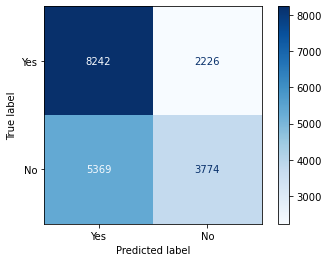

In [20]:
# Plot confusion matrix.
metrics.plot_confusion_matrix(lr, X_test_sc, y_test, cmap='Blues', 
                      values_format='d', display_labels=['Yes', 'No']);

__KNN Modeling__

In [21]:
# Instantiate.
knn = KNeighborsClassifier()

# Fit.
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [22]:
print(f'Training Accuracy Score: {knn.score(X_train_sc, y_train)}')
print(f'Testing Accuracy Score: {knn.score(X_test_sc, y_test)}')
#print(f'Cross Validation Score: {cross_val_score(knn,X_train_sc,y_train).mean()}')

Training Accuracy Score: 0.7192157162708278
Testing Accuracy Score: 0.5645811024425068


__Random Forest__

In [25]:
rf = RandomForestClassifier(n_estimators=100)
rf_score = cross_val_score(rf, X_train_sc, y_train, cv=5, scoring ='accuracy').mean()
rf_score

0.6156729938303256

__Most Important Features Using a Decision Tree__

In [26]:
dt = DecisionTreeClassifier(max_depth = 25, criterion = "entropy", max_features=None, min_samples_split=5)
dt.fit(X_train_sc, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_split=5)

__Grid Search__